## Dependancies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [51]:
data = pd.read_csv('diabetes1.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Domain analysis

#### 1. Pregnancies
- 0–2: Normal range (no pregnancies or few).
- 3–6: Moderate (average women in the dataset).
- ≥7: High (linked to higher diabetes risk in some studies).

#### 2. Glucose (mg/dL after 2-hr OGTT)
- < 140: Normal.
- 140–199: Prediabetes (impaired glucose tolerance).
- - ≥ 200: Diabetes.

#### 3. BloodPressure (mmHg, Diastolic)
- < 80: Normal.
- 80–89: Pre-hypertension.
- ≥ 90: High blood pressure.

#### 4. SkinThickness (mm, triceps fold)
- 10–20 mm: Lean/normal.
-20–30 mm: Average.
- > 30 mm: Higher body fat (risk factor).
(0 values in dataset often mean missing data, not real measurement).

#### 5. Insulin (mu U/ml, 2-hr serum)
- 16–166: Normal fasting insulin.
- > 200: Hyperinsulinemia (often linked with insulin resistance).
(Zeros are usually missing values).

#### 6. BMI (kg/m²)
- < 18.5: Underweight.
- 18.5–24.9: Normal.
- 25–29.9: Overweight.
- ≥ 30: Obese (major risk factor for diabetes).

#### 7. DiabetesPedigreeFunction (genetic risk factor)
- < 0.4: Low risk.
- 0.4–0.8: Medium risk.
- ≥ 0.8: High genetic risk.

#### 8. Age (years)
- < 30: Low risk.
- 30–50: Moderate risk.
- ≥ 50: High risk.

#### 9. Outcome
- 0: No diabetes.
- 1: Diabetes.

## Basic Checks

In [52]:
data.size

6912

In [53]:
data.shape

(768, 9)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
# Statistical analysis
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Insights:

1. Missing or Unrealistic Values (Data Quality Issue)
- Many features have 0 as minimum where 0 is not possible in real life (e.g., Glucose, BloodPressure, SkinThickness, Insulin, BMI).
- These are likely missing values coded as 0, and need to be treated before modeling.

2. Glucose is a Key Separator
- Median Glucose = 117, while the 75th percentile is 140.
- This matches medical cutoffs: values ≥140 indicate prediabetes/diabetes.
- Suggests glucose will be one of the strongest predictors of diabetes (Outcome).

3. BMI Shows Overweight Tendency
- Mean BMI = 31.99, which is already in the obese category (≥30).
- Even the 25th percentile is 27.3 (overweight).
- So, most participants are overweight or obese → confirms BMI as a major risk factor.

4. Age Distribution is Skewed Young
- Median Age = 29, 75th percentile = 41.
- But max is 81, meaning some older patients are included.
- Diabetes cases likely rise with age, but this dataset is skewed towards younger women.

5. Insulin Has Extreme Outliers
- Mean = 79.79, but Max = 846 → very high compared to normal (16–166).
- Std deviation is huge (115), meaning insulin levels are very spread out.
- This suggests many outliers or improper recordings (again, many 0 values).

## EDA

In [56]:
# Checking zeros that means missing values.
cols_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
data[cols_zero] = data[cols_zero].replace(0,np.nan)
data[cols_zero].isna().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [57]:
missing_counts = data[cols_zero].isna().sum()
missing_counts

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

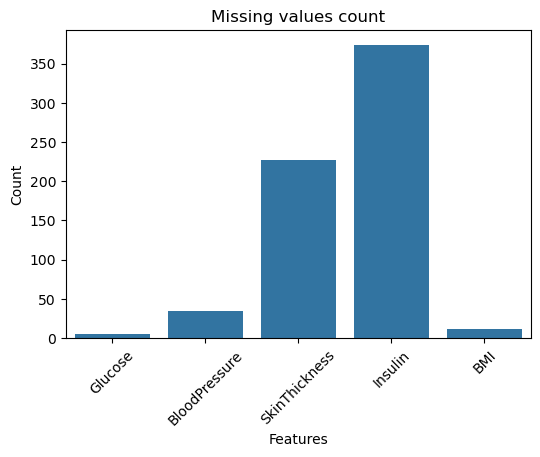

In [58]:
# Missing values graph
plt.figure(figsize=(6,4))
sns.barplot(x=missing_counts.index,y=missing_counts.values)
plt.title("Missing values count")
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('Features')
plt.show()

- As we can see column Insulin has most missing values(0) which is not possible in real human life.

#### 1. Univariate Analysis

##### 1.1 Distribution of columns

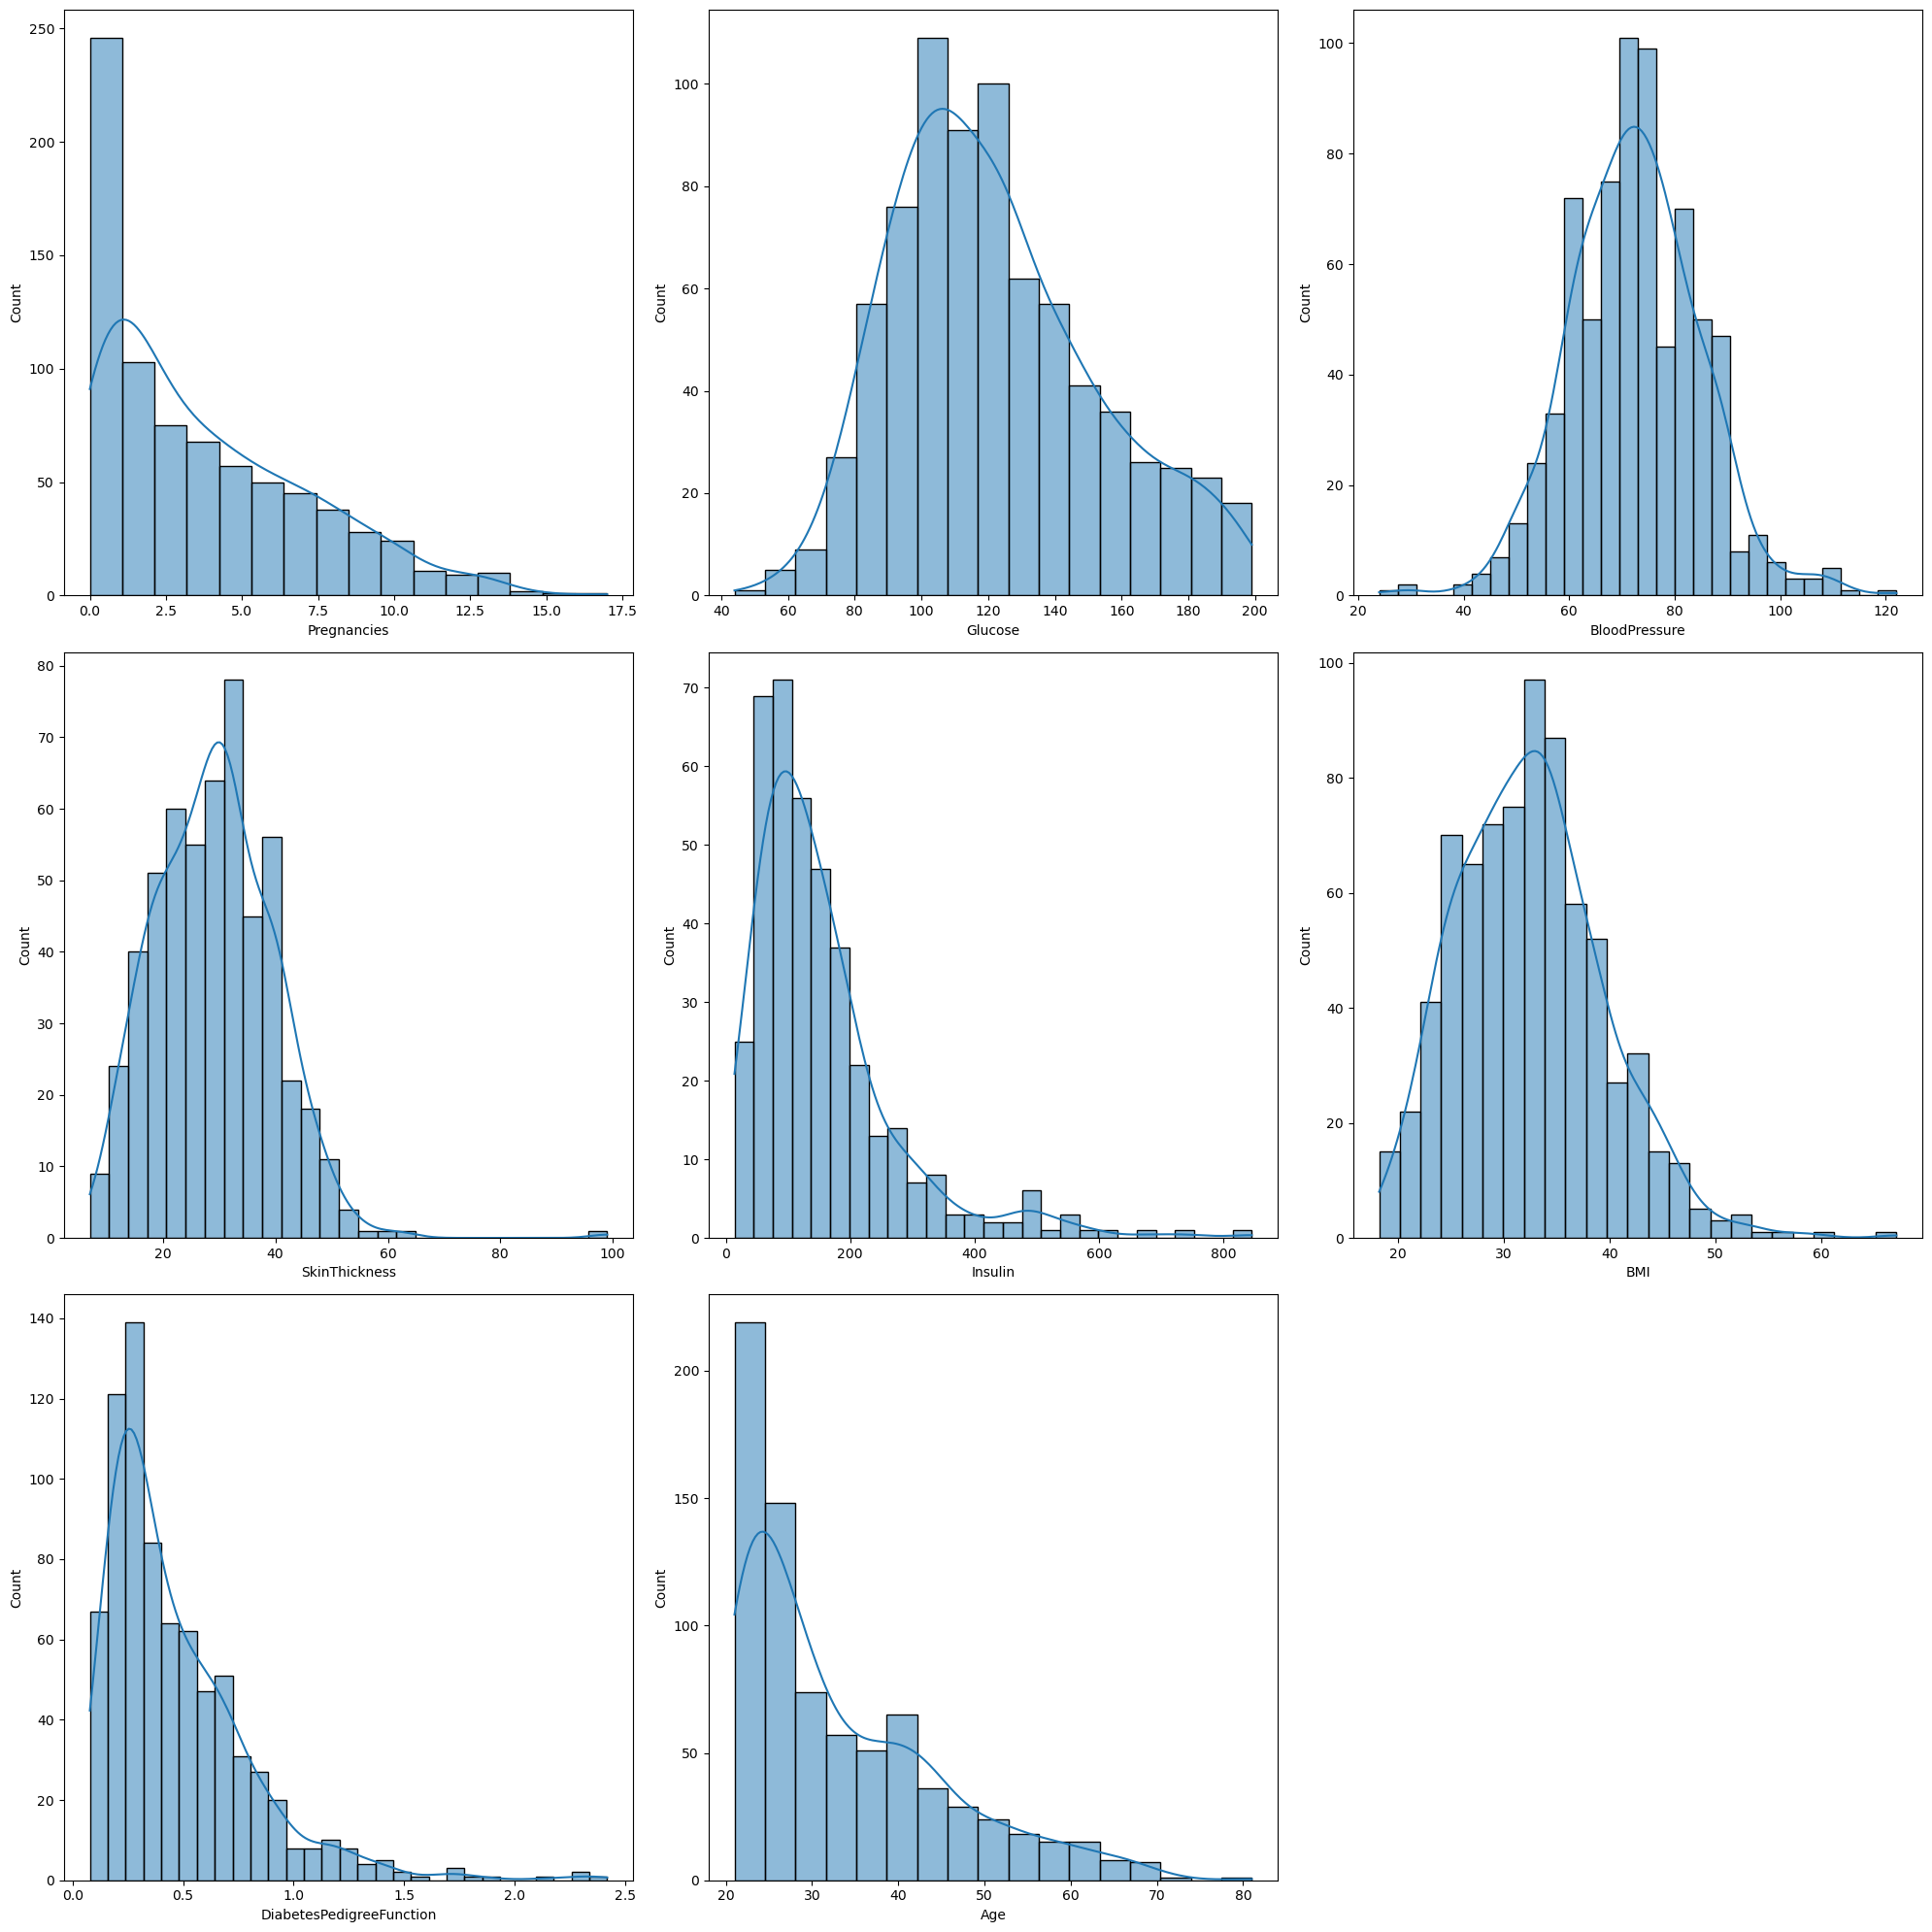

In [59]:
plt.figure(figsize=(20,20))
plotnumber = 1

for col in data.drop('Outcome',axis=1):
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[col],kde=True)
        plt.xlabel(col)
        plt.ylabel('Count')
    plotnumber+=1
plt.tight_layout()    

##### 1.2 Boxplot

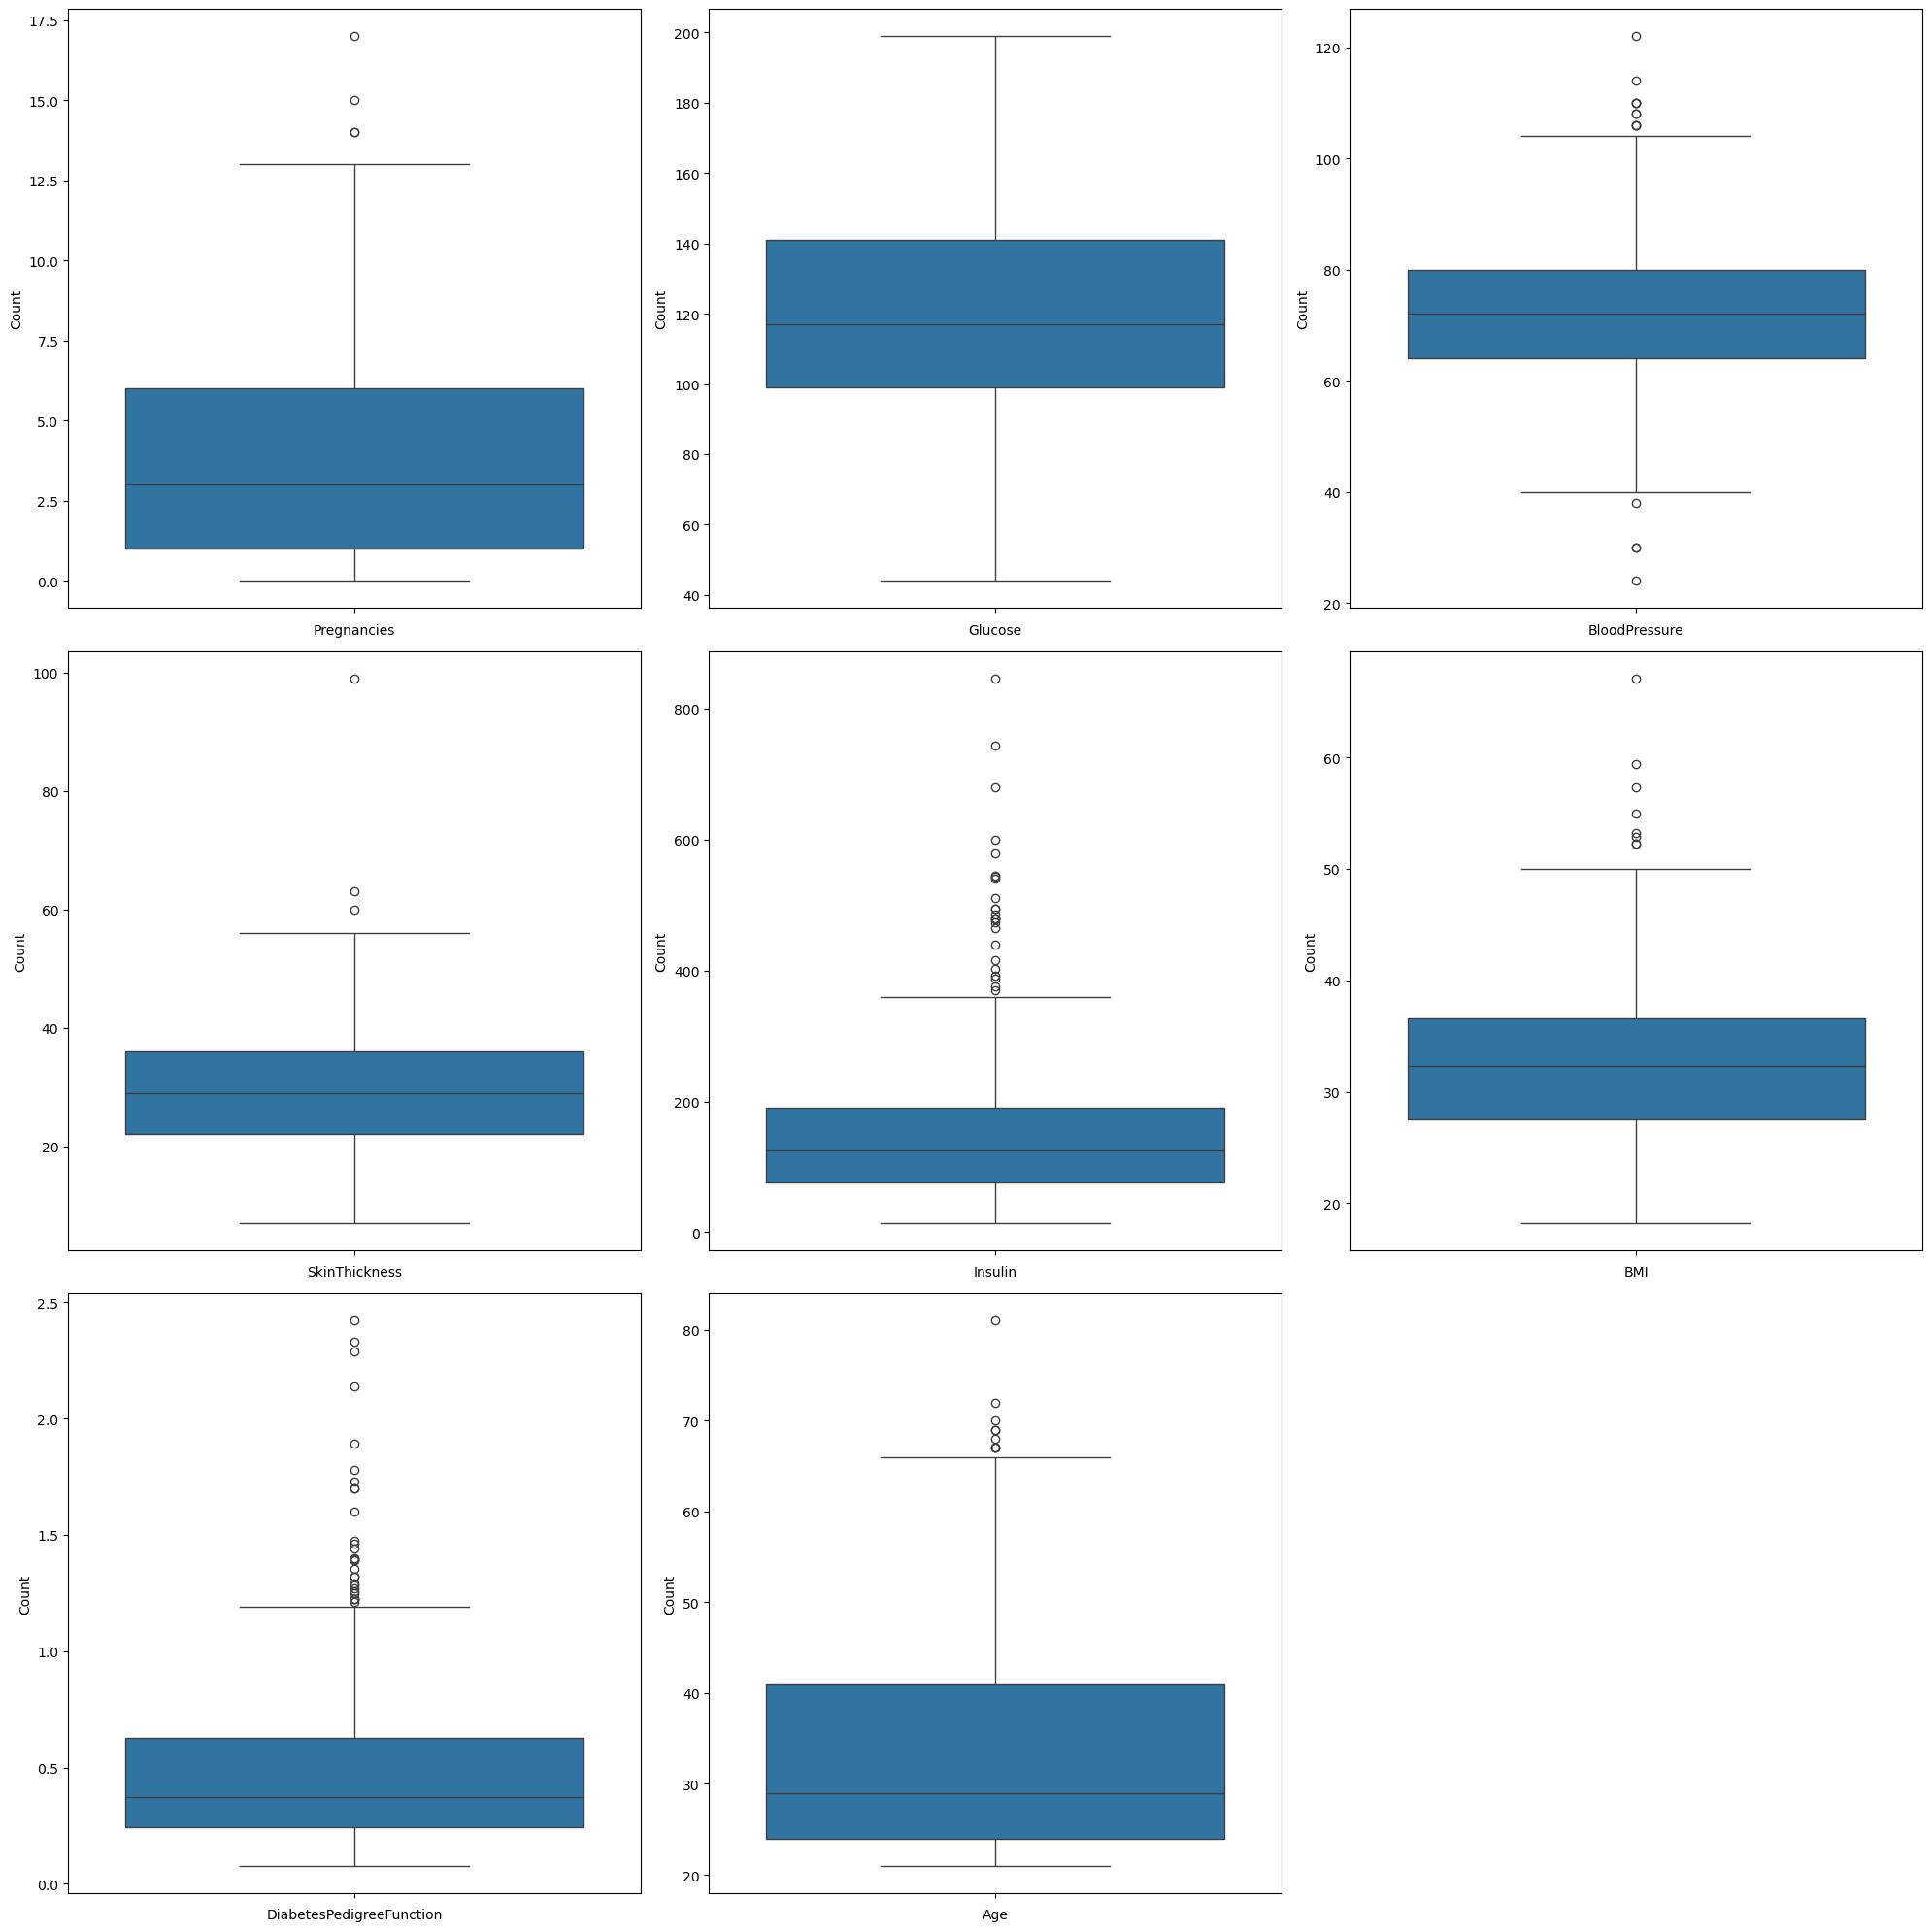

In [60]:
plt.figure(figsize=(20,20))
plotnumber = 1

for col in data.drop('Outcome',axis=1):
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.ylabel('Count')
    plotnumber+=1
plt.tight_layout()    

#### 2. Bivariate Analysis

##### 2.1 Correlation Map

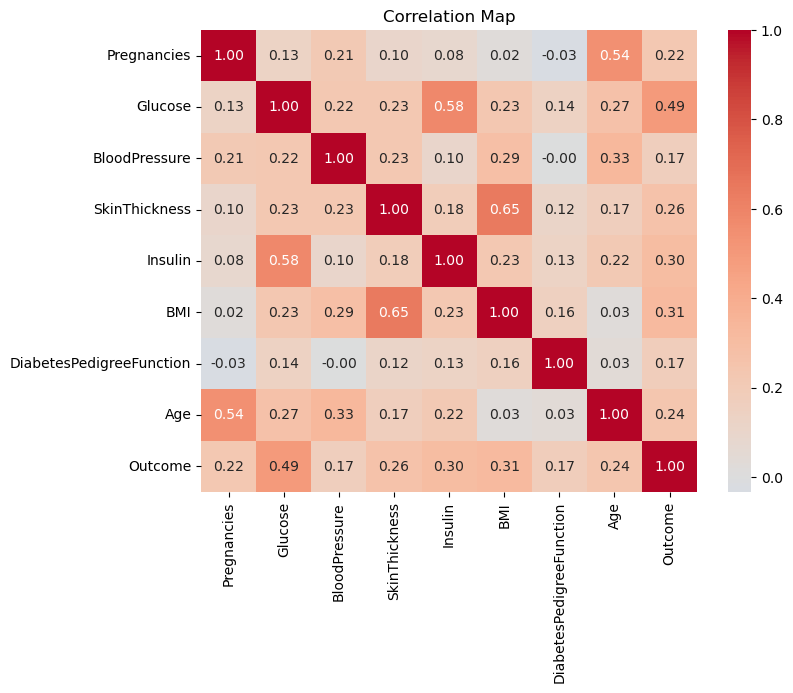

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='coolwarm',center=0)
plt.title(f"Correlation Map")
plt.show()

#### 3. Multivariate Analysis

##### 3.1 Pairplot

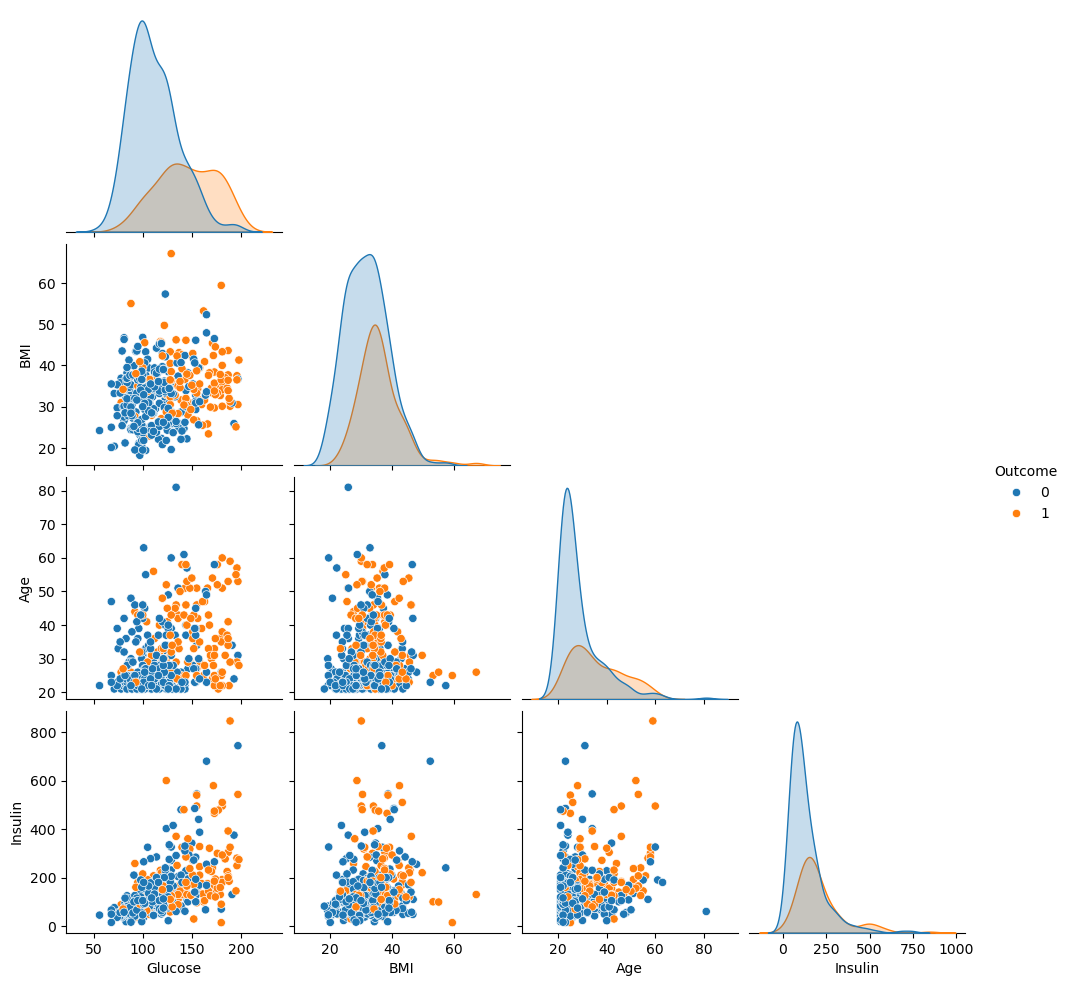

In [62]:
sns.pairplot(data[['Glucose','BMI','Age','Insulin','Outcome']].dropna(), hue='Outcome', diag_kind='kde', corner=True)
plt.show()

## Data Preprocessing

### 1. Handling missing values.

In [63]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [64]:
# Percentage of missing values
miss_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
print('Percentage of missing values:')
for c in miss_cols:
    perc = data[c].isnull().sum()/len(data)*100
    print(f"{c}:{perc:.2f}%")

Percentage of missing values:
Glucose:0.65%
BloodPressure:4.56%
SkinThickness:29.56%
Insulin:48.70%
BMI:1.43%


<b>We will deal with missing values as mentioned below:</b>  
- We will use Median imputation for the columns which have missing values < 40%
- And we will use KNNImputer for the column Insulin rather than dropping the whole column because it is essential for Diabetes data.

In [65]:
# Imputing missing values from columns using SImpleImputer -> ('SkinThickness','BMI')
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data[['Glucose','BloodPressure','SkinThickness','BMI']] = imputer.fit_transform(data[['Glucose','BloodPressure','SkinThickness','BMI']])

In [66]:
# Imputing missing values from columns using KNNImputer -> ('insulin')
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data[['Insulin']] = imputer.fit_transform(
    data[['Insulin']]
)

In [67]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
data.shape

(768, 9)

### 2. Outliers handling

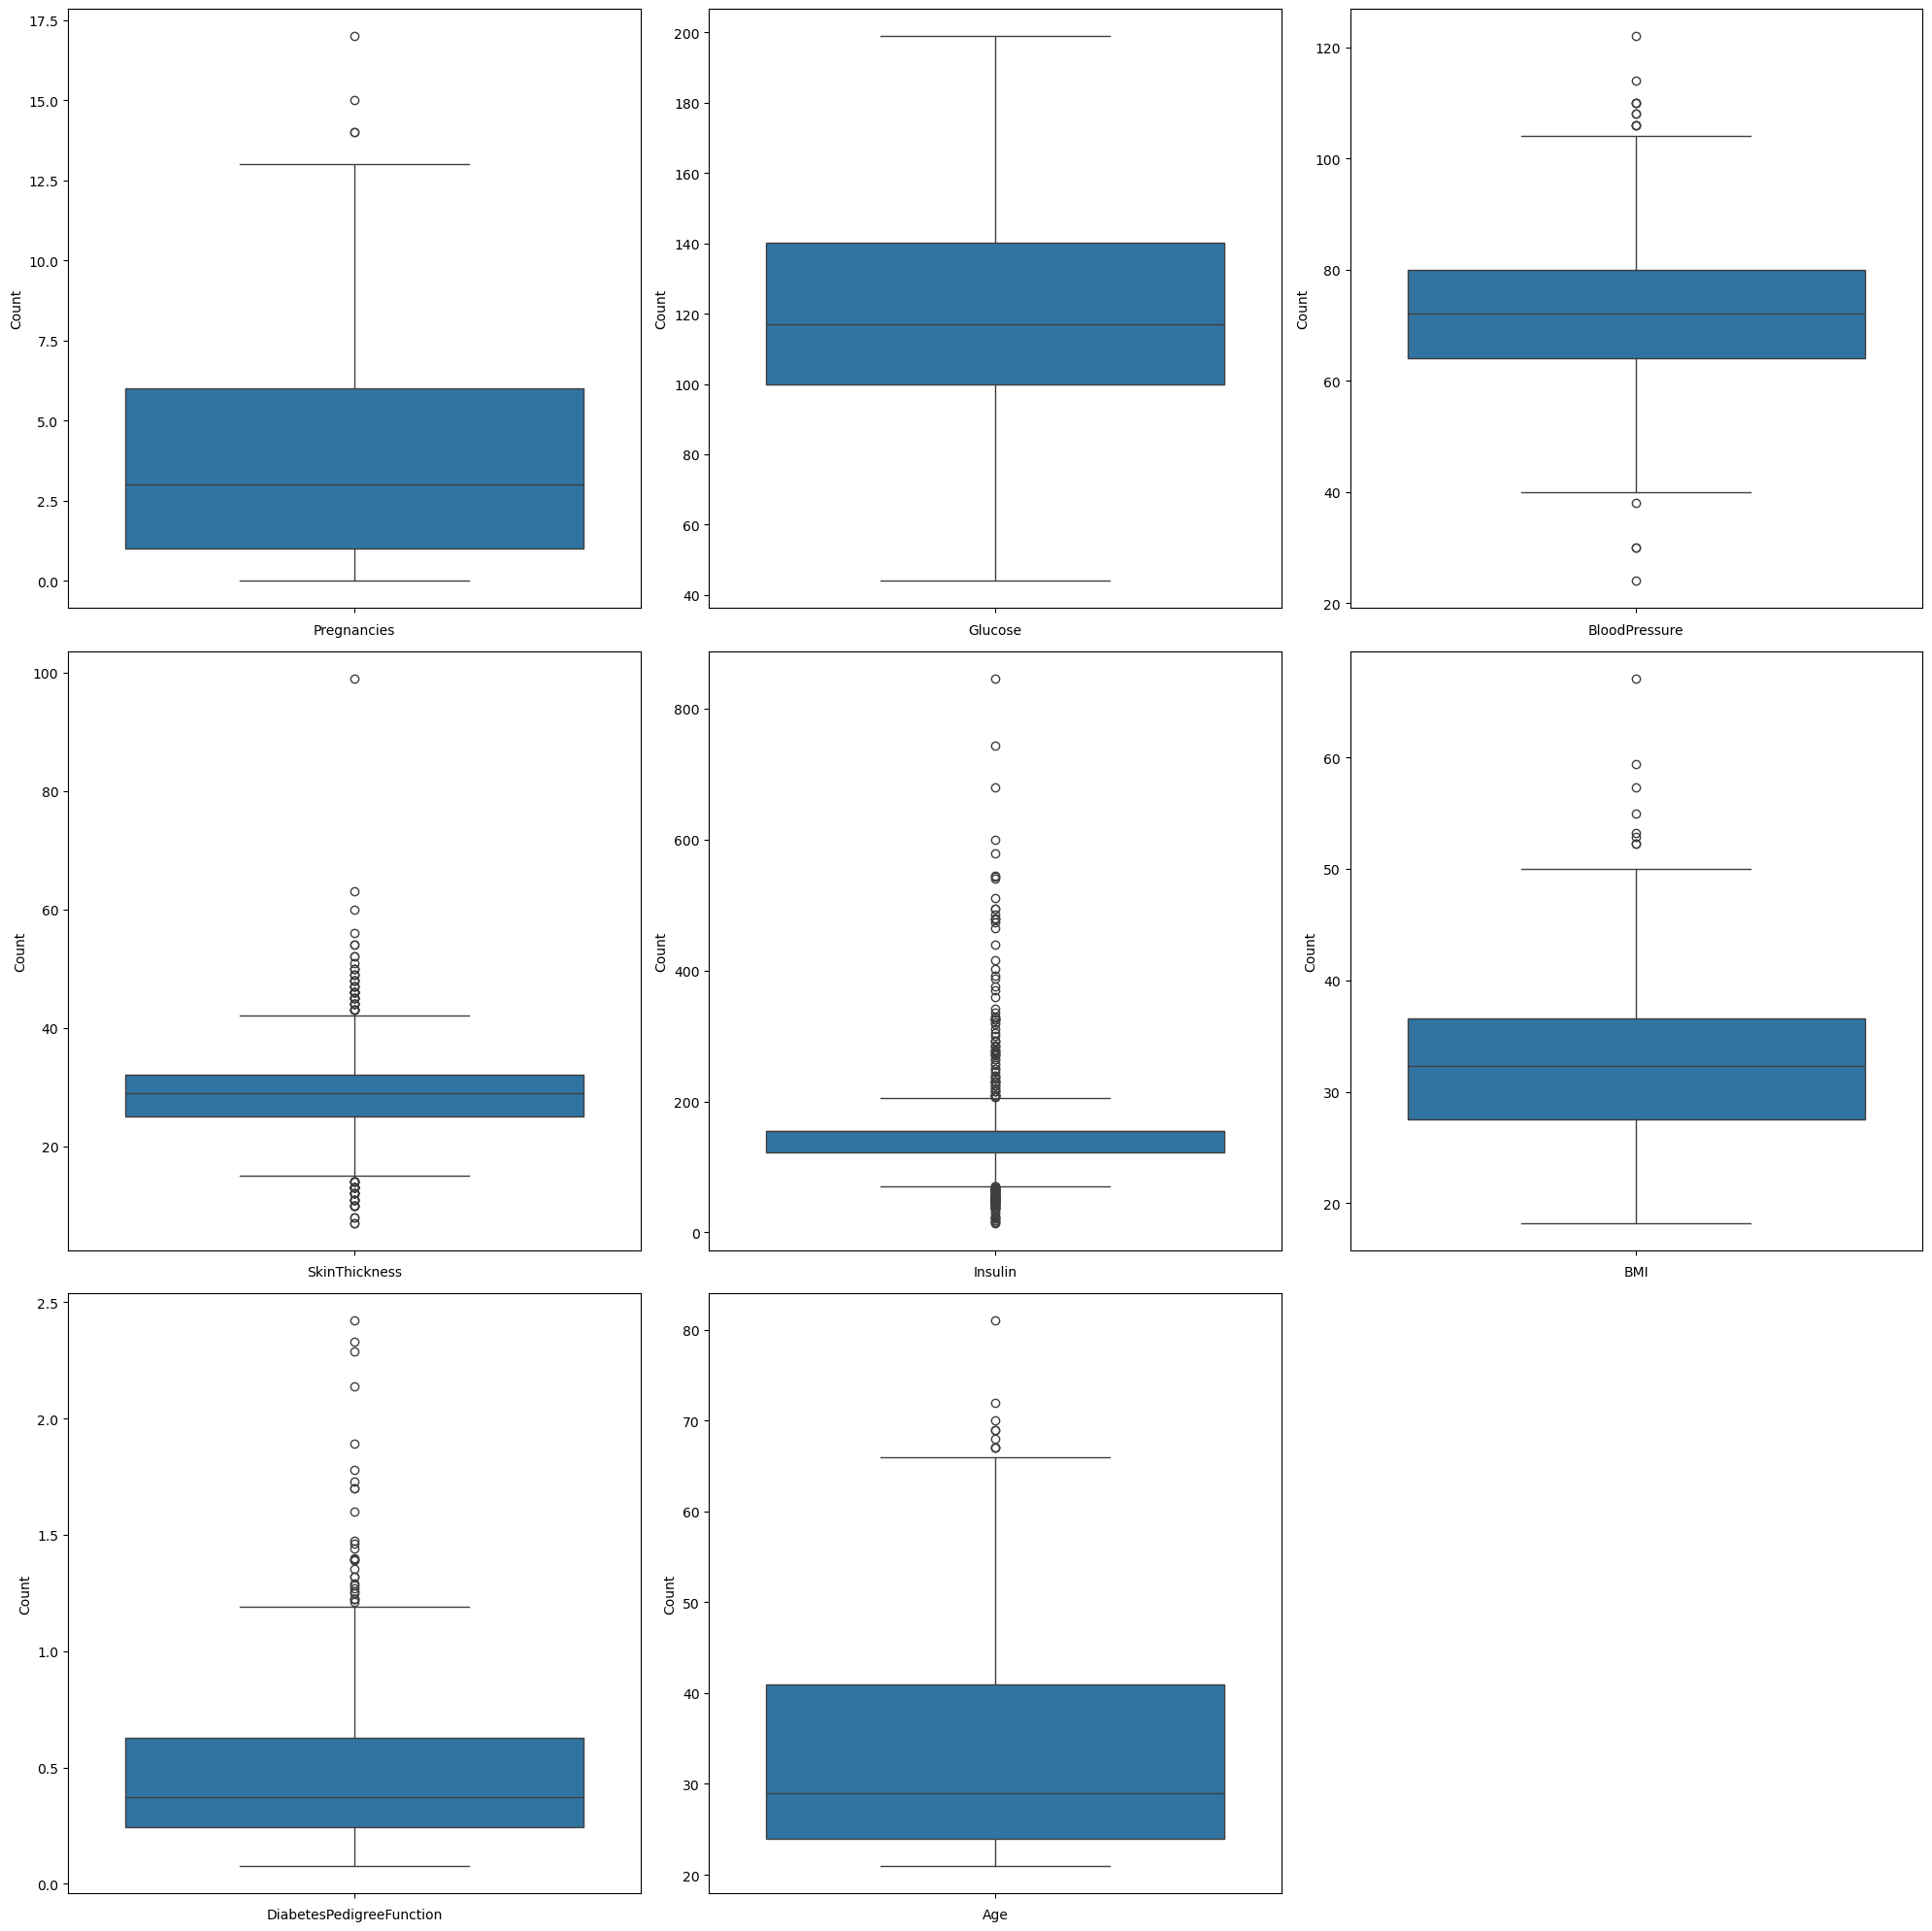

In [69]:
plt.figure(figsize=(20,20))
plotnumber = 1

for i in data.drop('Outcome',axis=1):
     if plotnumber < 9:
         ax = plt.subplot(3,3,plotnumber)
         sns.boxplot(data[i])
         plt.xlabel(i)
         plt.ylabel('Count')
     plotnumber+=1
plt.tight_layout()

In [70]:
# we will check the percentage of outliers present in each column
def outlier_percentage(data):
    result = {}
    for col in data.columns:
        if data[col].dtype != 'O':   # skip categorical columns
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            low_bound = q1 - 1.5 * iqr
            up_bound = q3 + 1.5 * iqr
            
            col_data = data[col].dropna()
            outliers = col_data[(col_data < low_bound) | (col_data > up_bound)]
            perc = len(outliers) / len(col_data) * 100
            result[col] = round(perc, 2)
    
    return result


In [71]:
outlier_percentage(data)

{'Pregnancies': 0.52,
 'Glucose': 0.0,
 'BloodPressure': 1.82,
 'SkinThickness': 11.33,
 'Insulin': 21.35,
 'BMI': 1.04,
 'DiabetesPedigreeFunction': 3.78,
 'Age': 1.17,
 'Outcome': 0.0}

<b>We will only handle those columns whose Outliers percentage are less than 5%.</b>

In [72]:
# 1. BloodPressure

q1 = data['BloodPressure'].quantile(0.25)
q3 = data['BloodPressure'].quantile(0.75)
iqr = q3 - q1
print('iqr=',iqr)
up_bound = q3+1.5*iqr
low_bound = q1-1.5*iqr
print(f"up_bound:{up_bound}")
print(f"low_bound:{low_bound}")

iqr= 16.0
up_bound:104.0
low_bound:40.0


In [73]:
data[(data['BloodPressure']<low_bound) | (data['BloodPressure']>up_bound)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38.0,83.000000,43.3,0.183,33,0
43,9,171.0,110.0,24.0,240.000000,45.4,0.721,54,1
84,5,137.0,108.0,29.0,155.548223,48.8,0.227,37,1
106,1,96.0,122.0,29.0,155.548223,22.4,0.207,27,0
125,1,88.0,30.0,42.0,99.000000,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.000000,67.1,0.319,26,1
362,5,103.0,108.0,37.0,155.548223,39.2,0.305,65,0
549,4,189.0,110.0,31.0,155.548223,28.5,0.680,37,0
597,1,89.0,24.0,19.0,25.000000,27.8,0.559,21,0
599,1,109.0,38.0,18.0,120.000000,23.1,0.407,26,0


In [74]:
data.loc[(data['BloodPressure']<low_bound) | (data['BloodPressure']>up_bound),'BloodPressure'] = data['BloodPressure'].median()

<Axes: ylabel='BloodPressure'>

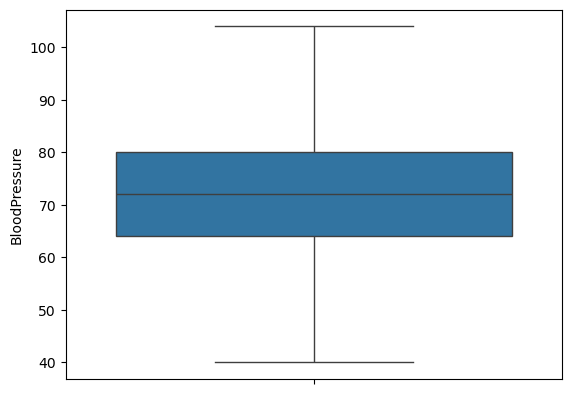

In [75]:
sns.boxplot(data['BloodPressure'])

In [76]:
# 2. BMI

q1 = data['BMI'].quantile(0.25)
q3 = data['BMI'].quantile(0.75)
iqr = q3 - q1
print('iqr=',iqr)
up_bound = q3+1.5*iqr
low_bound = q1-1.5*iqr
print(f"up_bound:{up_bound}")
print(f"low_bound:{low_bound}")

iqr= 9.100000000000001
up_bound:50.25
low_bound:13.849999999999998


In [77]:
data[(data['BMI']<low_bound) | (data['BMI']>up_bound)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.0,56.0,100.000000,53.2,0.759,25,1
125,1,88.0,72.0,42.0,99.000000,55.0,0.496,26,1
177,0,129.0,72.0,46.0,130.000000,67.1,0.319,26,1
193,11,135.0,72.0,29.0,155.548223,52.3,0.578,40,1
247,0,165.0,90.0,33.0,680.000000,52.3,0.427,23,0
303,5,115.0,98.0,29.0,155.548223,52.9,0.209,28,1
445,0,180.0,78.0,63.0,14.000000,59.4,2.420,25,1
673,3,123.0,100.0,35.0,240.000000,57.3,0.880,22,0


In [78]:
data.loc[(data['BMI']<low_bound) | (data['BMI']>up_bound),'BMI'] = data["BMI"].median()

<Axes: ylabel='BMI'>

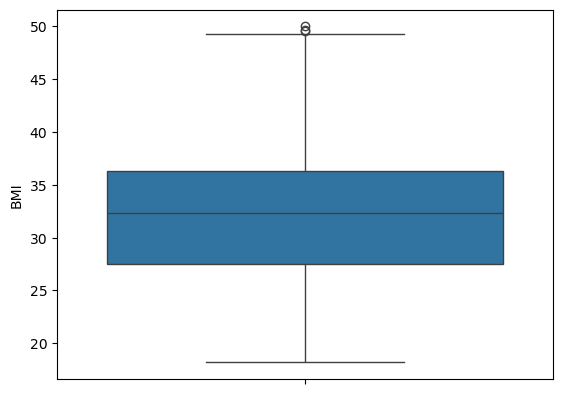

In [79]:
sns.boxplot(data['BMI'])

In [80]:
# 3. 

q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
q3 = data['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3 - q1
print('iqr=',iqr)
up_bound = q3+1.5*iqr
low_bound = q1-1.5*iqr
print(f"up_bound:{up_bound}")
print(f"low_bound:{low_bound}")

iqr= 0.38249999999999995
up_bound:1.2
low_bound:-0.32999999999999996


In [81]:
data[(data['DiabetesPedigreeFunction']<low_bound) | (data['DiabetesPedigreeFunction']>up_bound)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
12,10,139.0,80.0,29.0,155.548223,27.1,1.441,57,0
39,4,111.0,72.0,47.0,207.000000,37.1,1.390,56,1
45,0,180.0,66.0,39.0,155.548223,42.0,1.893,25,1
58,0,146.0,82.0,29.0,155.548223,40.5,1.781,44,0
100,1,163.0,72.0,29.0,155.548223,39.0,1.222,33,1
147,2,106.0,64.0,35.0,119.000000,30.5,1.400,34,0
187,1,128.0,98.0,41.0,58.000000,32.0,1.321,33,1
218,5,85.0,74.0,22.0,155.548223,29.0,1.224,32,1
228,4,197.0,70.0,39.0,744.000000,36.7,2.329,31,0


In [82]:
data.loc[(data['DiabetesPedigreeFunction']<low_bound) | (data['DiabetesPedigreeFunction']>up_bound),'DiabetesPedigreeFunction'] = data["DiabetesPedigreeFunction"].median()

<Axes: ylabel='DiabetesPedigreeFunction'>

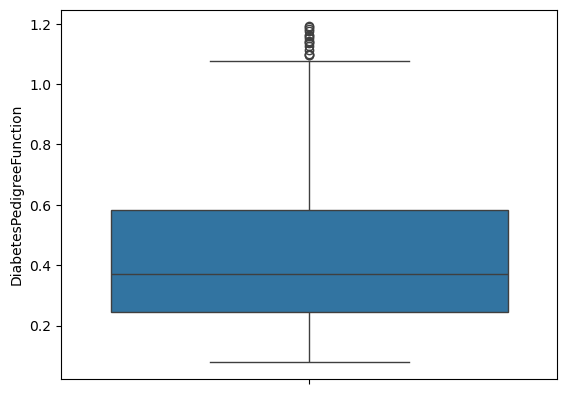

In [83]:
sns.boxplot(data['DiabetesPedigreeFunction'])

### 3. Splitting Data into input and output features.

In [84]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

### 4. Train Test split

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [86]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (614, 8)
y_train: (614,)
x_test: (154, 8)
y_test: (154,)


### 4. Feature Scaling

In [87]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [88]:
print(x_train_scaled)
print('-'*100)
print(x_test_scaled)

[[-0.85135507 -1.05642747 -0.91010854 ... -0.78639693  0.57867216
  -0.79216928]
 [ 0.35657564  0.14439907  0.56870494 ... -0.40984632  0.01456943
   0.56103382]
 [-0.5493724  -0.55608308 -1.27981191 ...  0.42170296 -0.84158649
  -0.70759409]
 ...
 [-0.85135507 -0.82293342 -0.1707018  ...  0.92377045 -0.86959159
  -0.28471812]
 [ 1.86648903 -0.35594533 -0.1707018  ... -0.7393281  -1.1776477
   0.56103382]
 [ 0.05459296  0.74481233 -1.27981191 ... -0.42553593 -0.59354132
   0.30730824]]
----------------------------------------------------------------------------------------------------
[[ 0.96054099  1.24515673 -0.72525685 ... -0.75501771 -0.56553622
   0.56103382]
 [ 1.86648903 -1.79026591  0.01414988 ...  0.51584061 -0.60154278
   1.15306018]
 [-0.5493724   0.01097389  0.38385325 ...  0.57859905  0.19060149
  -0.6230189 ]
 ...
 [-0.5493724  -1.32327781 -1.83436696 ... -0.58243201 -0.25147902
  -0.70759409]
 [ 0.05459296  2.07906404  0.56870494 ...  0.75118475 -0.68555808
  -0.20014293

## Model Building

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

## Model Testing & Evaluation

In [90]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

In [91]:
y_pred_train = lr.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train,y_pred_train)
y_pred_test = lr.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test,y_pred_test)

In [92]:
print("Train Accuracy:",train_accuracy)
print("Test Accuracy:",test_accuracy)

Train Accuracy: 0.7638436482084691
Test Accuracy: 0.7337662337662337


In [93]:
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[75, 25],
       [16, 38]], dtype=int64)

In [99]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



In [94]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Manual Predictive System

In [95]:
import numpy as np 

input_data = {
    "Pregnancies":2,
    "Glucose":120,
    "BloodPressure":70,
    "SkinThickness":25,
    "Insulin":80,
    "BMI":28.5,
    "DiabetesPedigreeFunction":0.45,
    "Age":32
}

# Convert dictionary to array (2D because scaler/model expect that shape)
features_df = pd.DataFrame([input_data])

# Scale with your saved scaler
scaled_features = sc.transform(features_df)

# Predict
prediction = lr.predict(scaled_features)
probability = lr.predict_proba(scaled_features)[0][1]  # probability of diabetes

# Output
if prediction[0] == 1:
    print(f"Prediction: Diabetic (Probability: {probability:.2f})")
else:
    print(f"Prediction: Not Diabetic (Probability: {probability:.2f})")

Prediction: Not Diabetic (Probability: 0.29)


## Saving Model in pickle File.

In [96]:
import pickle
with open('Logistic_model.pkl','wb') as file:
    pickle.dump(lr,file)

In [97]:
# Saving scaling model as well

with open('Scaler.pkl','wb')as f:
    pickle.dump(sc,f)